In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.fft import rfft, rfftfreq 

# Useful shorthands

In [3]:
'''Column names of limbs that we care about atm:
- STRN
- LASI
- LSHO 
- LELB 
- LFIN
- LWRA
- LWRB'''

'''-------------CHOICES--------------'''
angLSHO = ["LASI","LSHO","LELB"]
angLELB = ["LSHO","LELB","LWRA"]
angLWRA = ["LELB","LWRA","LFIN"]
angRSHO = ["RASI","RSHO","RELB"]
angRELB = ["RSHO","RELB","RWRA"]
angRWRA = ["RELB","RWRA","RFIN"]

coarseness = 20 #min: 5 

#Frequency plotting things
angLST = [angLSHO,angLELB,angLWRA,angRSHO,angRELB,angRWRA] # list of angles to loop through
limbLST = ['LSHO','LELB','LWRA','RSHO','RELB','RWRA'] # list of angles to loop through

# Grab data from data folder

In [4]:
def np_piece_data_from_csv(num, piece):
    filename = f'/Users/HAQbook/Desktop/graaaaphs/data/piano01_00{str(piece)}_p{str(num)}.csv' #performance number 1-6
    repo = pd.read_csv(filename,header=0)
    columns=['Frame', 'Time (Seconds)']
    repo = repo.drop(columns, axis=1)
    vals = repo.to_numpy(dtype=float)
    return repo, vals

# Actual stuff

In [5]:
# single frequency plot for fixed piece and performance
def func(piece: int, perf: int, xlim: list[int], ylim: list[int], save: bool = False) -> None:
    perf_df, perf_np = np_piece_data_from_csv(perf,piece)
    pca = PCA(n_components=1)

    plt.clf() 
    for j,limb in enumerate(limbLST):
        xInd = perf_df.columns.get_loc("piano_pilot_01:"+limb+"x")
        y = np.array(perf_np[:,xInd:xInd+3])
        x = pca.fit_transform(y).flatten()
        
        N = np.size(x)
        yf = rfft(x)
        xf = rfftfreq(N, 1/(sr := 240))

        # generate plot, abs because yfs are complex
        plt.plot(xf, np.abs(yf),color=((6-j)/6,0.4,(j+1)/6,0.8), label=limb)

    plt.legend()
    plt.title(f'performance {perf} piece {piece}')
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    if save:
        plt.savefig(f'visuals/frequencies_w_pca_piece{piece}.png')

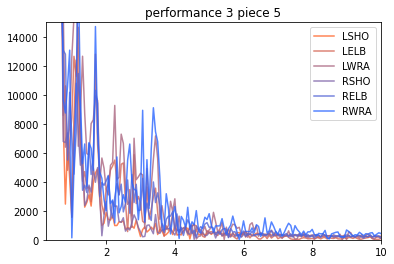

In [7]:
func(5, 3, [0.25, 10], [0, 15000])

In [17]:
# single frequency plot for fixed piece and limb
def func2(piece: int, perfs: list, xlim: list[int], ylim: list[int], save: bool = False) -> None:
    pca = PCA(n_components=1)

    plt.clf() 
    for j,perf in enumerate(perfs):
        perf_df, perf_np = np_piece_data_from_csv(perf,piece)
        xInd = perf_df.columns.get_loc("piano_pilot_01:"+'LSHO'+"x")
        y = np.array(perf_np[:,xInd:xInd+3])
        x = pca.fit_transform(y).flatten()
        
        N = np.size(x)
        yf = rfft(x)
        xf = rfftfreq(N, 1/(sr := 240))

        # generate plot, abs because yfs are complex
        plt.plot(xf, np.abs(yf),color=((6-j)/6,0.4,(j+1)/6,0.8), label=perf)

    plt.legend()
    plt.title(f'LSHO piece {piece} pca transform, then fft')
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

    if save:
        plt.savefig(f'visuals/frequencies_w_pca_piece{piece}.png')

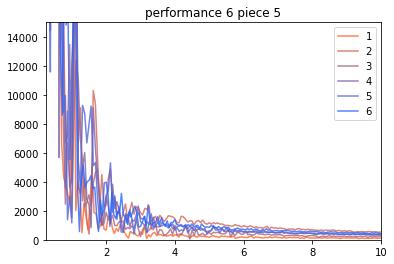

In [16]:
func2(5, [1,2,3,4,5,6], [0.25, 10], [0, 15000])